# 1. Initial Analysis

In [ ]:
import pandas as pd
df=pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
print("Number of data points:", len(df))
print("Number of unique types:", df['type'].nunique())
print("Number of unique titles:", df['title'].nunique())
print("Number of unique directors:", df['director'].nunique())
print("Number of unique release years:", df['release_year'].nunique())
print("Number of unique ratings:", df['rating'].nunique())

Number of data points: 8807
Number of unique types: 2
Number of unique titles: 8807
Number of unique directors: 4528
Number of unique release years: 74
Number of unique ratings: 17


In [ ]:
# Getting information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Getting statistical description about numerical columns of the dataframe
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
print("Number of data points:", len(df))
print("Unique data points of each column:")
print(df.nunique())

Number of data points: 8807
Unique data points of each column:
show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64


In [ ]:
df = df[df['type'] != 'TV Sh']

In [ ]:
# Top 10 directors with the most titles
top_directors = df['director'].value_counts().head(10)
print(top_directors)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: director, dtype: int64


In [ ]:
# Top 10 cast members with the most titles
top_cast = df['cast'].str.split(', ', expand=True).stack().value_counts().head(10)
print(top_cast)

Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
dtype: int64


# 2. Handling Null Values

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df.dropna(inplace=True, axis=0)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [ ]:
df.duplicated().sum()
df.drop_duplicates(keep='first',inplace=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


# 3. Visualizing Count of Movies/Shows Based on Various Parameters

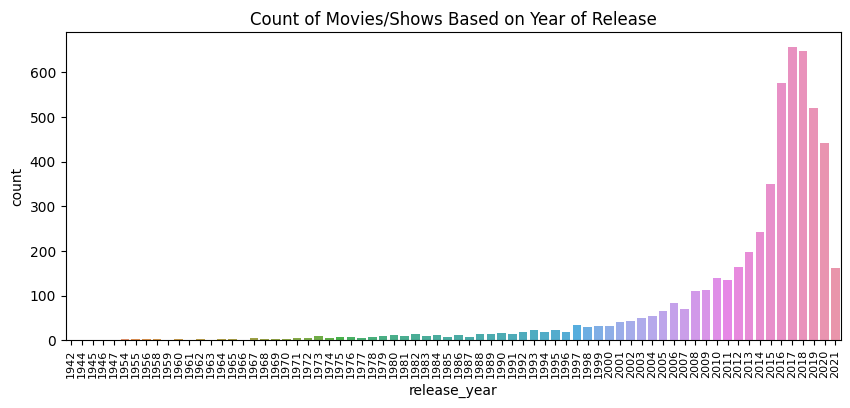

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a countplot
plt.figure(figsize=(10, 4))
countplot = sns.countplot(data=df, x='release_year')

# Rotate the x-axis labels and decrease their font size
countplot.set_xticklabels(countplot.get_xticklabels(), rotation=90, fontsize=8)

plt.title('Count of Movies/Shows Based on Year of Release')
plt.show()

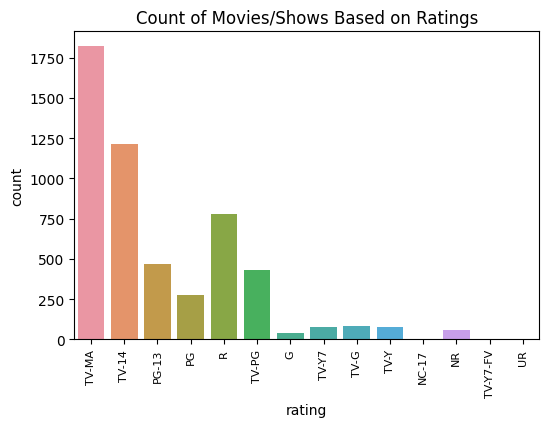

In [ ]:
# Create a countplot
plt.figure(figsize=(6, 4))
countplot = sns.countplot(data=df, x='rating')

# Rotate the x-axis labels and decrease their font size
countplot.set_xticklabels(countplot.get_xticklabels(), rotation=90, fontsize=8)

plt.title('Count of Movies/Shows Based on Ratings')
plt.show()

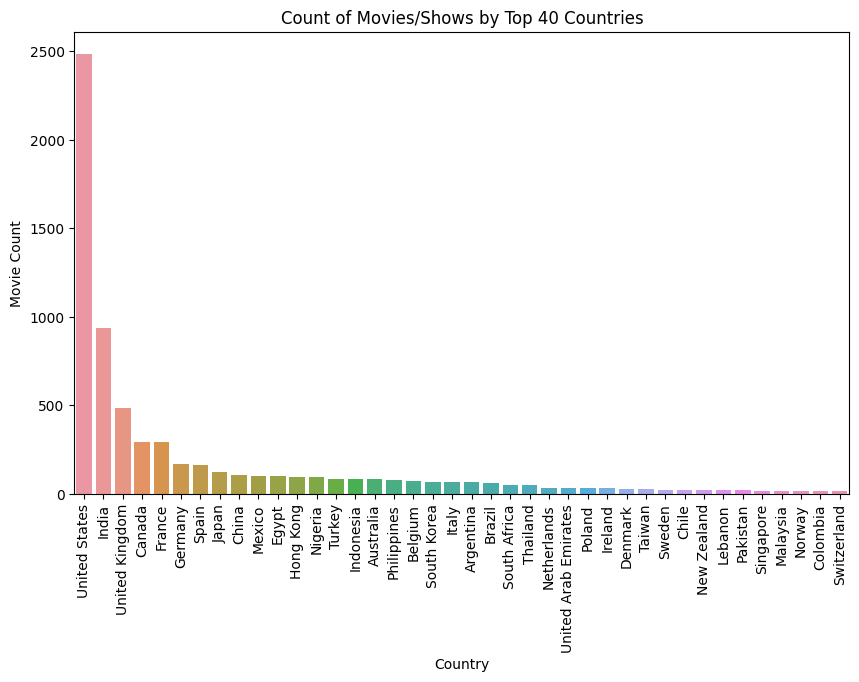

In [ ]:
# Data Preprocessing
df = df.copy()  # Create a copy of the DataFrame
df['country'] = df['country'].str.split(', ')

# Count the movies for each country
country_counts = df.explode('country')['country'].value_counts().reset_index()
country_counts.columns = ['country', 'Movie Count']

# Select the top 20 countries
top_40_countries = country_counts.head(40)

# Data Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=top_40_countries, x='country', y='Movie Count')
plt.xlabel('Country')
plt.ylabel('Movie Count')
plt.title('Count of Movies/Shows by Top 40 Countries')
plt.xticks(rotation=90)
plt.show()

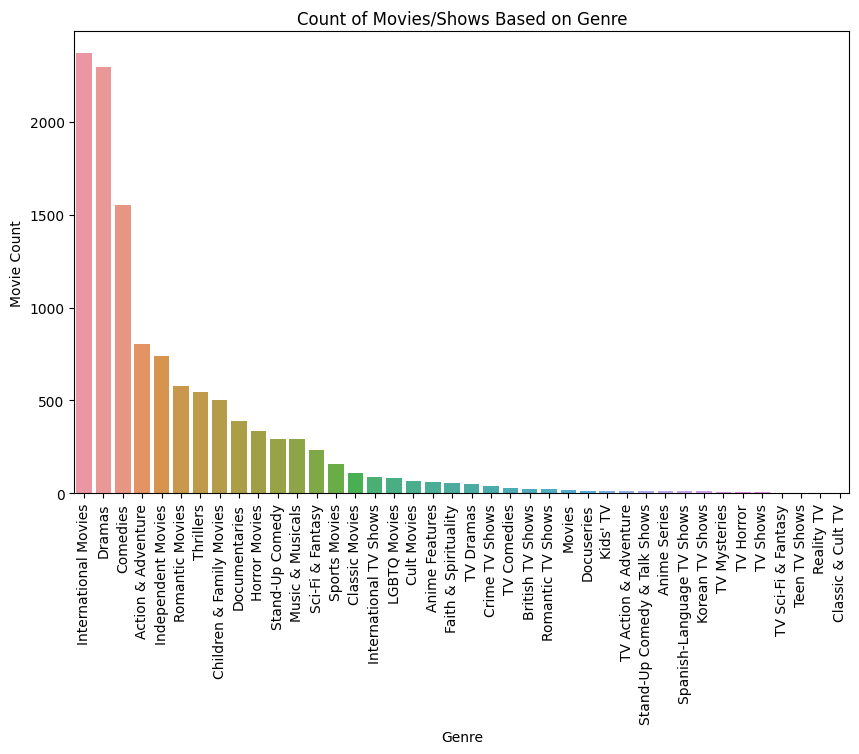

In [ ]:
# Data Preprocessing
df = df.copy()  # Create a copy of the DataFrame
df['listed_in'] = df['listed_in'].str.split(', ')

# Count the movies for each country
country_counts = df.explode('listed_in')['listed_in'].value_counts().reset_index()
country_counts.columns = ['listed_in', 'Movie Count']

# Select the top 20 countries
top_40_countries = country_counts.head(40)

# Data Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=top_40_countries, x='listed_in', y='Movie Count')
plt.xlabel('Genre')
plt.ylabel('Movie Count')
plt.title('Count of Movies/Shows Based on Genre')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Rating Analysis by Type')

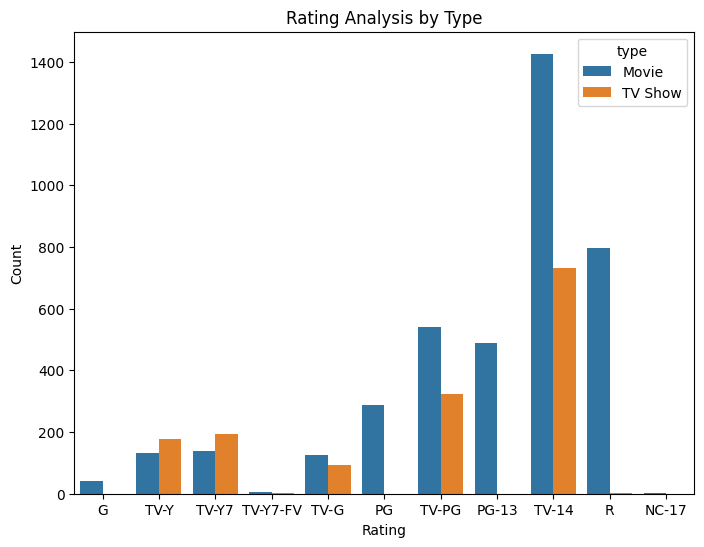

In [ ]:
# Rating Analysis by Type
# Create a custom order for ratings
custom_order = ['G', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'TV-G', 'PG', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17']

# Filter the DataFrame to only include rows with ratings in the custom order
df_filtered = df[df['rating'].isin(custom_order)]

plt.figure(figsize=(8, 6))
countplot = sns.countplot(data=df_filtered, x='rating', hue='type', order=custom_order)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Analysis by Type')

Text(0.5, 1.0, 'Top 10 Genres on Netflix')

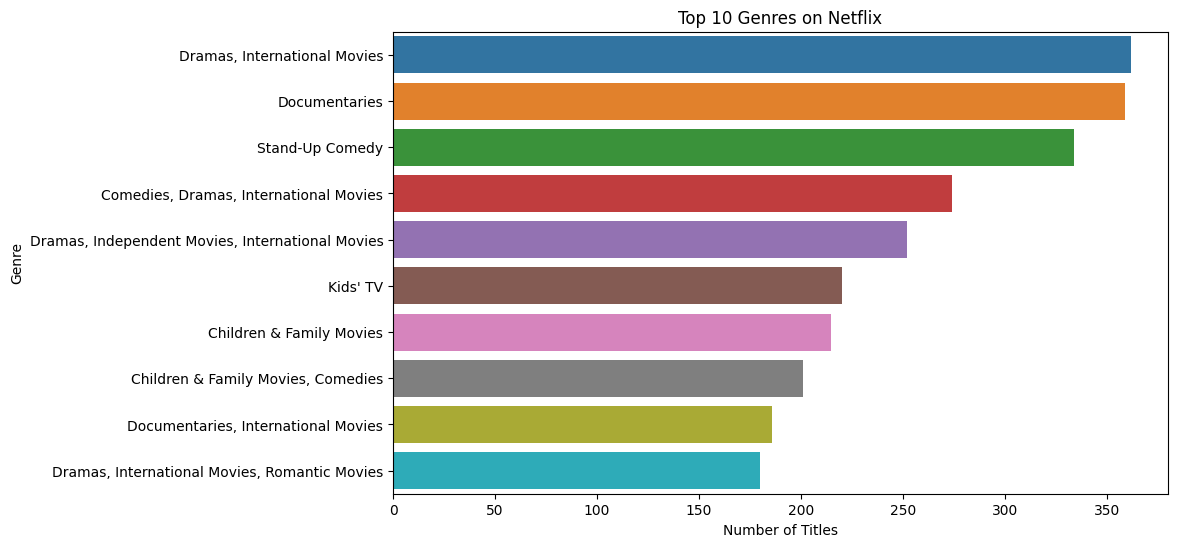

In [ ]:
plt.figure(figsize=(10, 6))
genre_counts = df.explode('listed_in')['listed_in'].value_counts().head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index, orient='h')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.title('Top 10 Genres on Netflix')